## Code stolen from Youtube
pre-processing part was added by me\
<font color="red">So far in logistic regression codes I wrote the problem was absence of a feature-scaling stage!</font>\



In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg


class LogisticRegression:
    means = None
    std = None
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        #r3ki3g's code
        #pre-processing
        self.mean =  np.mean(X,axis=0)
        self.std  =  np.std(X,axis=0)
        #standardize the data set
        X = (X-self.mean) / self.std
        
        
        # init parameters
        
        #r3ki3g chaned->undone
        self.weights = np.random.rand(n_features)
        self.bias = np.random.rand(1)
#         self.weights = np.array([-150.,1.,0.,0.])
#         self.bias = 4400.

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            diff = (y_predicted - y)
            dw = (1 / n_samples) * np.dot(X.T,diff )
            db = (1 / n_samples) * np.sum(diff)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        #r3ki3g - standardize
        X = (X-self.mean) / self.std
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))





## Testing phase

<IPython.core.display.Javascript object>


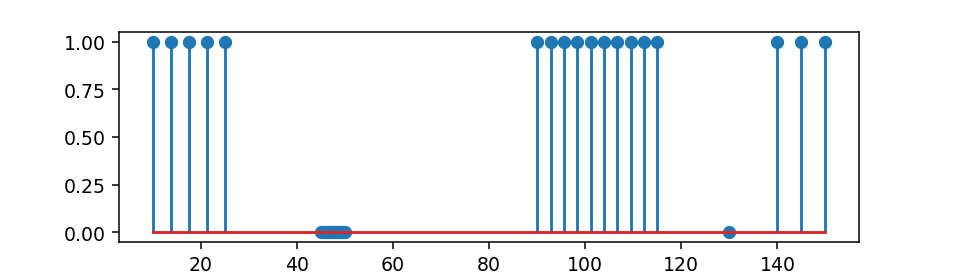

In [53]:
#generating data
#this time some spacing beteween the two classes will 
#be added to let the algorithm find a smoother seperation 
#rather than a sharp decision boundary


m1 = 5
m2 = 15
m3 = 10
m4 = 1
m5 = 3

x1 = np.linspace(10,25,m1)
x2 = np.linspace(45,50,m2)
x3 = np.linspace(90,115,m3)
x4 = np.linspace(130,135,m4)
x5 = np.linspace(140,150,m5)


y1 = np.ones(m1)
y2 = np.zeros(m2)
y3 = np.ones(m3)
y4 = np.zeros(m4)
y5 = np.ones(m5)

# y1 = np.zeros(m1)
# y2 = np.ones(m2)
# y3 = np.zeros(m3)

x = np.concatenate((x1,x2,x3,x4,x5))
y = np.concatenate((y1,y2,y3,y4,y5))

m = m1 + m2 + m3 + m4 + m5

#stem the data
fig,ax = plt.subplots(1,figsize=(7,2))
ax.stem(x,y)
plt.show()



In [54]:
#test data set
n_features = 10


x_test = np.linspace(10,150,100)
X_test = np.array([x_test**i for i in range(1,n_features+1)]).T



## Calculating/Optimizing the params

In [60]:
# Testing (training -- > predicting)


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


X = np.array([x**i for i  in range(1,n_features+1)]).T

regressor = LogisticRegression(learning_rate=0.01, n_iters=1_000_000)
regressor.fit(X, y)
predictions = regressor.predict(X_test)

#expected-time : 40mins (learning_rate=0.01, n_iters=100_000_000)

<IPython.core.display.Javascript object>


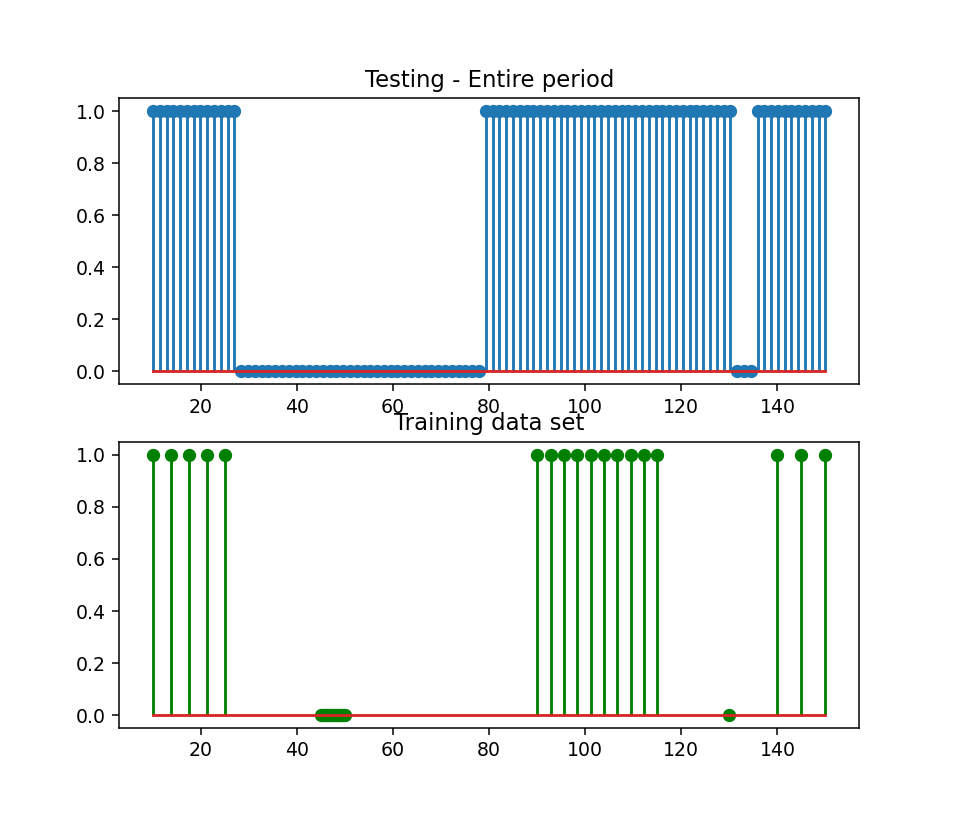

In [61]:
#plotiing predictions and true value

#stem the data
fig,ax = plt.subplots(2,figsize=(7,6))
ax[0].stem(x_test,predictions)
ax[0].set_ylim([0-0.05,1+0.05])
ax[0].set_title("Testing - Entire period")
ax[1].stem(X[:,0],y,'g')
ax[1].set_title("Training data set")
plt.show()

## Plot of the decision making function


<IPython.core.display.Javascript object>


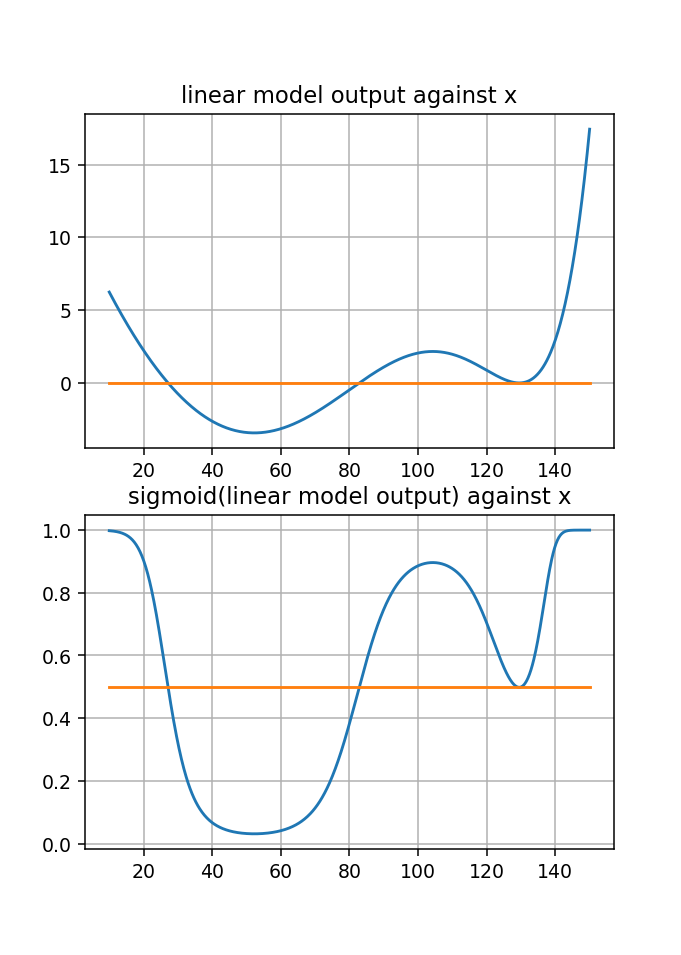

In [65]:
x_samples = np.linspace(10,150,1000)
X_samples = np.array([x_samples**i for i  in range(1,n_features+1)]).T

#standardize the data
u = np.mean(X_samples,axis=0)
s = np.std(X_samples,axis=0)
X_samples = (X_samples-u)/s

y_decision =  np.dot(X_samples, regressor.weights) + regressor.bias

fig,ax = plt.subplots(2,figsize=(5,7))
ax[0].plot(x_samples,y_decision)
ax[0].grid()

ax[1].plot(x_samples,regressor._sigmoid(y_decision))
ax[1].grid()


ax[0].plot([10,150],[0,0])
ax[0].set_title("linear model output against x")
ax[1].plot([10,150],[0.5,0.5])
ax[1].set_title("sigmoid(linear model output) against x")
plt.show()



In [8]:
X = np.array([[1,2,3],
             [2,3,4],
             [3,4,5],
             [4,5,6]])

u = np.mean(X,axis=0)
s = np.std(X,axis=0)
print(f"u = {u} & s = {s}")
#standardize
sX = (X-u)/s
sX

u = [2.5 3.5 4.5] & s = [1.11803399 1.11803399 1.11803399]


array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

In [63]:
print(f"weights = {regressor.weights} & bias = {regressor.bias}")

weights = [-21.60903576  26.40742083  19.81721193  -0.72740508 -14.17077685
 -18.43220807 -14.48636696  -4.19607346   7.772615    21.68106839] & bias = [0.59143782]


## Results - log-old
### when started from the zeros
weights = [ 6.25058731  7.90770695 -8.30254179 -7.2249415 ] & bias = -0.05197451101992074\

### when started from randomized arrays
weights = [ 6.06171826  7.82339923 -8.18393279 -7.05843209] & bias = [-0.05174499]\
weights = [ 5.9281061   8.3906194  -8.56455121 -7.13172838] & bias = [-0.05278748]


In [64]:
print(f"Summarry :  n_features : {n_features}")


Summarry :  n_features : 10
